# MotieTweeting Data Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
path = pathlib.Path('D:/Edu/data_resource/dataset-MovieTweetings')
file_full_name = path/'ratings.dat'
cols = ['user id', 'item id', 'rating', 'timestamp']
df_ratings = pd.read_csv(file_full_name, sep='::', names=cols, index_col=False, encoding='utf-8',engine='python')

In [3]:
df_ratings.head()

,user id,item id,rating,timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


In [4]:
df_ratings.tail()

,user id,item id,rating,timestamp
915365,71257,9893250,10,1613857551
915366,71257,9898858,3,1585958452
915367,71258,172495,10,1587107015
915368,71258,414387,10,1587107852
915369,71259,1623205,6,1362832655


In [5]:
df_ratings.dtypes

user id      int64
item id      int64
rating       int64
timestamp    int64
dtype: object

In [6]:
df_ratings.shape

(915370, 4)

In [7]:
df_ratings.groupby(by=['rating']).size()

rating
0        279
1      10752
2       9153
3      15387
4      28004
5      69169
6     119473
7     205171
8     220727
9     129426
10    107829
dtype: int64

In [8]:
df_ratings.groupby(by=['rating']).min()

,user id,item id,timestamp
rating,,,
0,11,17136,1364319907
1,2,22395,1362080826
2,69,12349,1362066071
3,3,833,1362072970
4,13,628,1362063879
5,3,8,1362063653
6,3,91,1362062307
7,3,91,1362063503
8,1,25,1362062624


In [9]:
df_ratings.groupby(by=['rating']).agg(['size','min','max'])

user id            item id                  timestamp              \
          size min    max    size    min       max      size         min   
rating                                                                     
0          279  11  71238     279  17136  12361974       279  1364319907   
1        10752   2  71257   10752  22395  14773250     10752  1362080826   
2         9153  69  71257    9153  12349  14074470      9153  1362066071   
3        15387   3  71257   15387    833  14544192     15387  1362072970   
4        28004  13  71257   28004    628  14880258     28004  1362063879   
5        69169   3  71257   69169      8  14781176     69169  1362063653   
6       119473   3  71259  119473     91  15112954    119473  1362062307   
7       205171   3  71257  205171     91  15085802    205171  1362063503   
8       220727   1  71254  220727     25  15085802    220727  1362062624   
9       129426   2  71257  129426    417  14735160    129426  1362064189   
10      107829   3  71258  107829     10  15085802    107829  1362066989   

                    
               max  
rating              
0       1625968910  
1       1629037706  
2       1629063801  
3       1629067426  
4       1629067803  
5       1629076954  
6       1629081818  
7       1629083283  
8       1629078141  
9       1629073479  
10      1629065556

In [10]:
df_ratings['rating']

0          8
1          9
2          8
3          1
4          1
          ..
915365    10
915366     3
915367    10
915368    10
915369     6
Name: rating, Length: 915370, dtype: int64

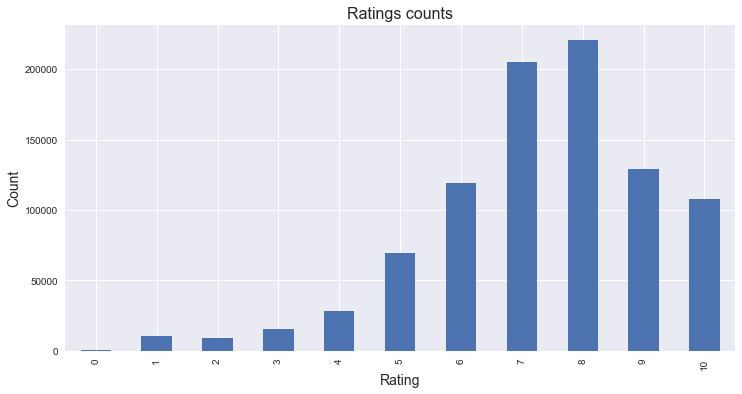

In [37]:
df_ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Ratings counts', fontsize=16)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

In [12]:
file_full_name = path/'movies.dat'
cols = ['movie id', 'name', 'genre']
df_movies = pd.read_csv(file_full_name, sep='::', names=cols, index_col=False, encoding='utf-8', engine='python')

df_movies[:10]

,movie id,name,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror
5,131,Une nuit terrible (1896),Short|Comedy|Horror
6,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi
7,439,The Great Train Robbery (1903),Short|Action|Crime|Western
8,443,"Hiawatha, the Messiah of the Ojibway (1903)",NaN
9,628,The Adventures of Dollie (1908),Action|Short


In [13]:
df_movies.tail()

,movie id,name,genre
37704,15004156,Woodstock 99: Peace Love and Rage (2021),NaN
37705,15036416,Shiny_Flakes: The Teenage Drug Lord (2021),NaN
37706,15042204,Medea (2021),NaN
37707,15085802,Untold: Malice at the Palace (2021),NaN
37708,15112954,Dal pianeta degli umani (2021),NaN


In [14]:
def change_name(x):
    x1 = x[:-7]
    x2 = x[-5:-1]
    return pd.Series((x1,x2))

df_movies_name = df_movies['name'].apply(change_name)
df_movies_name.columns = ['name','year']
df_movies_name = df_movies_name.astype({'name':np.unicode_,'year':np.int32})
df_movies_name

,name,year
0,Edison Kinetoscopic Record of a Sneeze,1894
1,La sortie des usines Lumière,1895
2,The Arrival of a Train,1896
3,The Oxford and Cambridge University Boat Race,1895
4,Le manoir du diable,1896
...,...,...
37704,Woodstock 99: Peace Love and Rage,2021
37705,Shiny_Flakes: The Teenage Drug Lord,2021
37706,Medea,2021
37707,Untold: Malice at the Palace,2021


In [15]:
df_movies_name.dtypes

name    object
year     int32
dtype: object

In [16]:
df_movies_name.shape

(37709, 2)

In [17]:
df_movies_new = pd.concat([df_movies.drop('name',axis=1),df_movies_name], axis=1)
df_movies_new

,movie id,genre,name,year
0,8,Documentary|Short,Edison Kinetoscopic Record of a Sneeze,1894
1,10,Documentary|Short,La sortie des usines Lumière,1895
2,12,Documentary|Short,The Arrival of a Train,1896
3,25,NaN,The Oxford and Cambridge University Boat Race,1895
4,91,Short|Horror,Le manoir du diable,1896
...,...,...,...,...
37704,15004156,NaN,Woodstock 99: Peace Love and Rage,2021
37705,15036416,NaN,Shiny_Flakes: The Teenage Drug Lord,2021
37706,15042204,NaN,Medea,2021
37707,15085802,NaN,Untold: Malice at the Palace,2021


In [18]:
df_popularity = df_ratings.groupby(by=['item id']).agg(['size','mean'])
df_popularity

user id           rating       timestamp              
            size      mean   size  mean      size          mean
item id                                                        
8              1  43197.00      1   5.0         1  1.396981e+09
10             1  71052.00      1  10.0         1  1.412879e+09
12             1  70002.00      1  10.0         1  1.439249e+09
25             1  37892.00      1   8.0         1  1.488190e+09
91             3  32733.00      3   6.0         3  1.493503e+09
...          ...       ...    ...   ...       ...           ...
15004156       2  37080.50      2   8.0         2  1.627798e+09
15036416       1  43296.00      1   7.0         1  1.628731e+09
15042204       1  41052.00      1   8.0         1  1.628608e+09
15085802       4  34864.25      4   8.0         4  1.628817e+09
15112954       1  41052.00      1   6.0         1  1.628435e+09

[37704 rows x 6 columns]

In [19]:
df_popularity = df_popularity.loc[:,'rating']
df_popularity.columns = ['rating_count', 'mean_rating']
df_popularity

,rating_count,mean_rating
item id,,
8,1,5.0
10,1,10.0
12,1,10.0
25,1,8.0
91,3,6.0
...,...,...
15004156,2,8.0
15036416,1,7.0
15042204,1,8.0


In [20]:
df_movie_merge = pd.merge(df_movies_new, df_popularity, how='outer', left_on=['movie id'], right_on='item id')
df_movie_merge

,movie id,genre,name,year,rating_count,mean_rating
0,8,Documentary|Short,Edison Kinetoscopic Record of a Sneeze,1894,1,5.0
1,10,Documentary|Short,La sortie des usines Lumière,1895,1,10.0
2,12,Documentary|Short,The Arrival of a Train,1896,1,10.0
3,25,NaN,The Oxford and Cambridge University Boat Race,1895,1,8.0
4,91,Short|Horror,Le manoir du diable,1896,3,6.0
...,...,...,...,...,...,...
37704,15004156,NaN,Woodstock 99: Peace Love and Rage,2021,2,8.0
37705,15036416,NaN,Shiny_Flakes: The Teenage Drug Lord,2021,1,7.0
37706,15042204,NaN,Medea,2021,1,8.0
37707,15085802,NaN,Untold: Malice at the Palace,2021,4,8.0


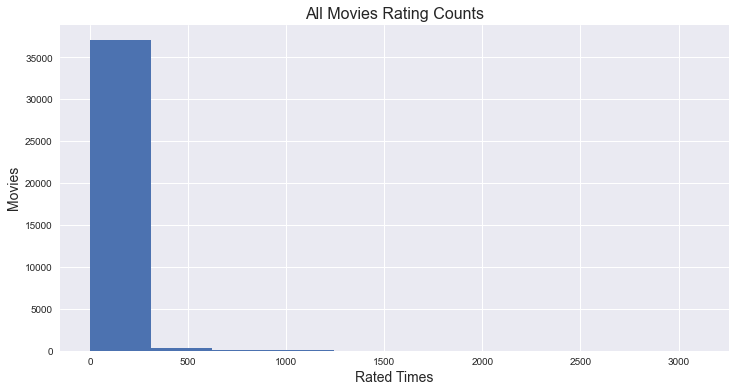

In [44]:
df_movie_merge['rating_count'].plot(kind='hist')
plt.xlabel('Rated Times',fontsize=14)
plt.ylabel('Movies',fontsize=14)
plt.title('All Movies Rating Counts',fontsize=16)
plt.show()

In [22]:
df_very_popular_movies = df_movie_merge[df_movie_merge['rating_count']>500]
df_very_popular_movies

,movie id,genre,name,year,rating_count,mean_rating
2180,50083,Crime|Drama,12 Angry Men,1957,867,9.216840
4140,68646,Crime|Drama,The Godfather,1972,713,9.050491
4683,73486,Drama,One Flew Over the Cuckoo's Nest,1975,600,8.935000
4877,75314,Crime|Drama,Taxi Driver,1976,624,7.971154
5527,81505,Drama|Horror,The Shining,1980,534,8.123596
...,...,...,...,...,...,...
35167,7713068,Action|Adventure|Crime,Birds of Prey: And the Fantabulous Emancipatio...,2020,788,6.578680
35716,8367814,Action|Crime,The Gentlemen,2019,1306,8.235069
35864,8579674,Drama|War,1917,2019,2889,8.616130
36102,8946378,Comedy|Crime|Drama|Mystery|Thriller,Knives Out,2019,1305,8.202299


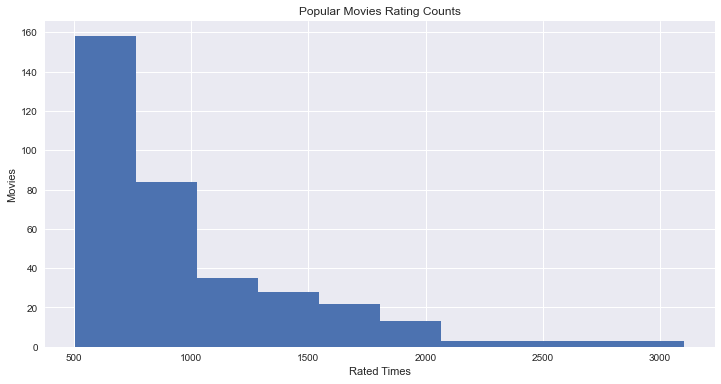

In [43]:
df_very_popular_movies['rating_count'].plot(kind='hist')
plt.xlabel('Rated Times')
plt.ylabel('Movies')
plt.title('Popular Movies Rating Counts')
plt.show()

In [24]:
crime_movies = df_movies_new[df_movies_new['genre'] == 'Crime|Drama']
crime_movies[:10]

,movie id,genre,name,year
16,2844,Crime|Drama,Fantômas - À l'ombre de la guillotine,1913
252,20859,Crime|Drama,Escape!,1930
268,21406,Crime|Drama,Sono yo no tsuma,1930
280,21739,Crime|Drama,La chienne,1931
286,21785,Crime|Drama,Daughter of the Dragon,1931
310,22286,Crime|Drama,The Public Enemy,1931
311,22335,Crime|Drama,Safe in Hell,1931
315,22403,Crime|Drama,Smart Money,1931
348,23054,Crime|Drama,The Impassive Footman,1932
395,23817,Crime|Drama,Blondie Johnson,1933


In [25]:
crime_movies_ratings = pd.merge(df_ratings, crime_movies, how='inner', left_on='item id', right_on = 'movie id').drop(['movie id', 'genre'],axis=1)
crime_movies_ratings

,user id,item id,rating,timestamp,name,year
0,3,75314,1,1595468524,Taxi Driver,1976
1,147,75314,8,1457203139,Taxi Driver,1976
2,183,75314,7,1533154956,Taxi Driver,1976
3,194,75314,10,1362969531,Taxi Driver,1976
4,207,75314,7,1383567805,Taxi Driver,1976
...,...,...,...,...,...,...
18014,69390,267622,7,1436730424,Jukgeona hokeun nabbeugeona,2000
18015,69390,305240,4,1376741796,Araburu tamashii-tachi,2001
18016,69390,430772,6,1457892326,Wong gok hak yau,2004
18017,69390,2354525,5,1415762025,Jat jik,2012


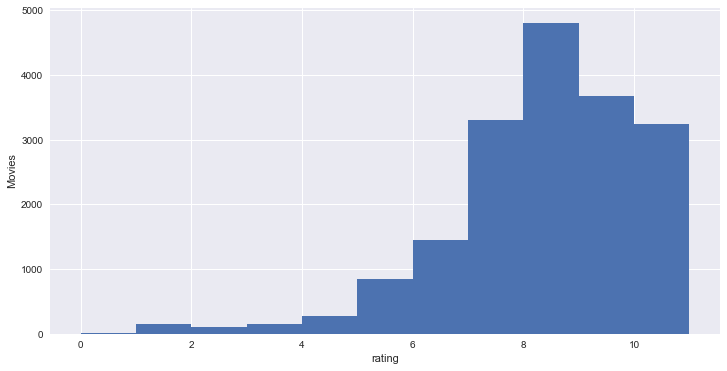

In [45]:
crime_movies_ratings['rating'].plot(kind='hist',bins=[0,1,2,3,4,5,6,7,8,9,10,11])
plt.xlabel('rating')
plt.ylabel('Movies')
plt.show()

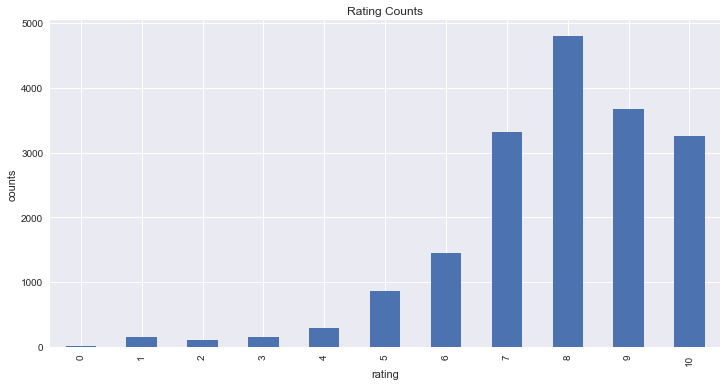

In [36]:
crime_movies_ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Rating Counts')
plt.show()

In [28]:
crime_movies_rating_count = crime_movies_ratings.groupby(by=['item id']).agg('size')
crime_movies_rating_count.rename('rating_count',inplace=True)
crime_movies_rating_count

item id
2844         1
20859        2
21406        1
21739        3
21785        1
            ..
10376384     1
10397734     1
10409590     1
10535594     2
10883506    10
Name: rating_count, Length: 454, dtype: int64

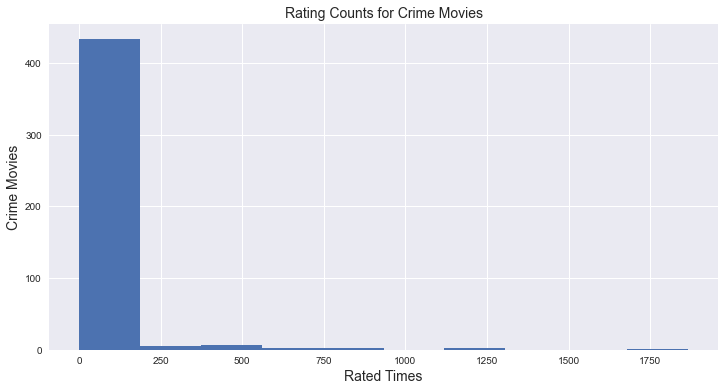

In [46]:
crime_movies_rating_count.plot(kind='hist')
plt.title('Rating Counts for Crime Movies',fontsize=14)
plt.xlabel('Rated Times',fontsize=14)
plt.ylabel('Crime Movies',fontsize=14)
plt.show()

In [30]:
crime_movies_update = pd.merge(crime_movies, crime_movies_rating_count, how='left', left_on='movie id', right_on='item id')
crime_movies_update

,movie id,genre,name,year,rating_count
0,2844,Crime|Drama,Fantômas - À l'ombre de la guillotine,1913,1
1,20859,Crime|Drama,Escape!,1930,2
2,21406,Crime|Drama,Sono yo no tsuma,1930,1
3,21739,Crime|Drama,La chienne,1931,3
4,21785,Crime|Drama,Daughter of the Dragon,1931,1
...,...,...,...,...,...
449,10376384,Crime|Drama,Go back,2020,1
450,10397734,Crime|Drama,The Set Up,2019,1
451,10409590,Crime|Drama,Byk,2019,1
452,10535594,Crime|Drama,Rounds,2019,2


In [31]:
crime_movies_popular = crime_movies_update[crime_movies_update['rating_count']>500]
crime_movies_popular

,movie id,genre,name,year,rating_count
31,50083,Crime|Drama,12 Angry Men,1957,867
68,68646,Crime|Drama,The Godfather,1972,713
89,75314,Crime|Drama,Taxi Driver,1976,624
156,110912,Crime|Drama,Pulp Fiction,1994,868
179,144084,Crime|Drama,American Psycho,2000,514
250,780504,Crime|Drama,Drive,2011,573
311,1800241,Crime|Drama,American Hustle,2013,1866
318,1872194,Crime|Drama,The Judge,2014,880
319,1895587,Crime|Drama,Spotlight,2015,1266
395,5027774,Crime|Drama,"Three Billboards Outside Ebbing, Missouri",2017,1177


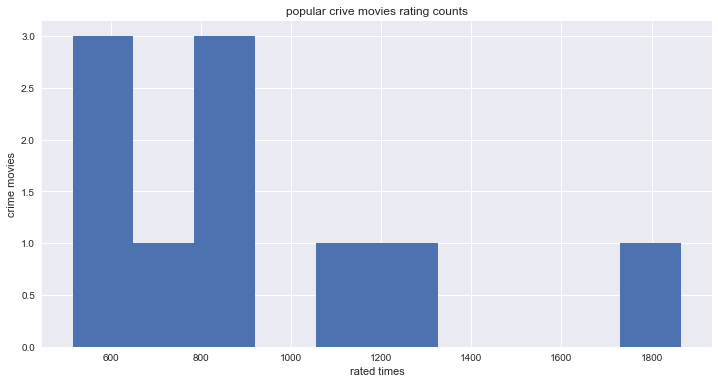

In [47]:
crime_movies_popular['rating_count'].plot(kind='hist')
plt.xlabel('rated times')
plt.ylabel('crime movies')
plt.title('popular crive movies rating counts')
plt.show()